In [5]:
#------------------------------------------------------ Linear Regression (predicting numbers) ---------------------------------------------------------------

Mean Squared Error: 1392439737.0343318
R^2 Score: -54.69758948137327


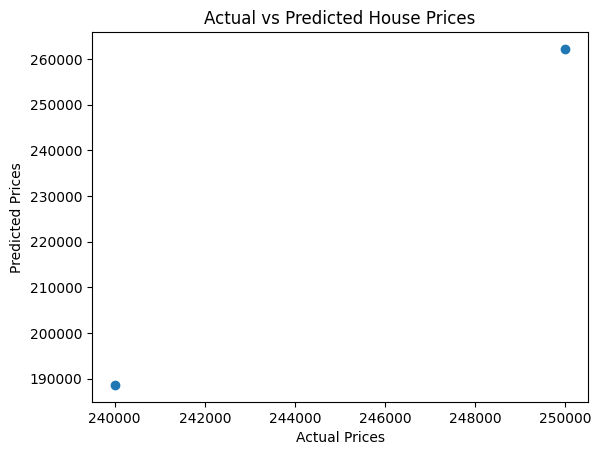

In [6]:

# 1 - Can you predict house price based on the number of rooms and location?

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Sample Dataset Creation
data = {
    'rooms': [2, 3, 4, 3, 5, 4, 6, 3, 2, 5],
    'location': ['Downtown', 'Suburb', 'Downtown', 'Suburb', 'Downtown', 'Suburb', 'Downtown', 'Suburb', 'Suburb', 'Downtown'],
    'price': [300000, 250000, 400000, 280000, 500000, 320000, 600000, 260000, 240000, 520000]
}
df = pd.DataFrame(data)

# Step 3: Encode the 'location' categorical feature
encoder = OneHotEncoder(sparse_output=False)
location_encoded = encoder.fit_transform(df[['location']])
location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(['location']))

# Step 4: Prepare final dataset
X = pd.concat([df[['rooms']], location_df], axis=1)
y = df['price']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 9: Visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Example dataset: Rooms, Location (encoded), Price
# Location encoding: 1 = Suburban, 2 = City, 3 = Premium city center
rooms = np.array([2, 3, 4, 3, 5])
location = np.array([1, 2, 2, 3, 3])
price = np.array([200000, 250000, 300000, 280000, 400000])

# Combine rooms and location into feature matrix
X = np.column_stack((rooms, location))
y = price

# Build model
model = LinearRegression()
model.fit(X, y)

# Predict for a new house: 3 rooms, location=2 (City)
predicted_price = model.predict([[3, 2]])
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 260769.23076923078


Predicted marks for study hours 11, 12, 13: [85. 90. 95.]


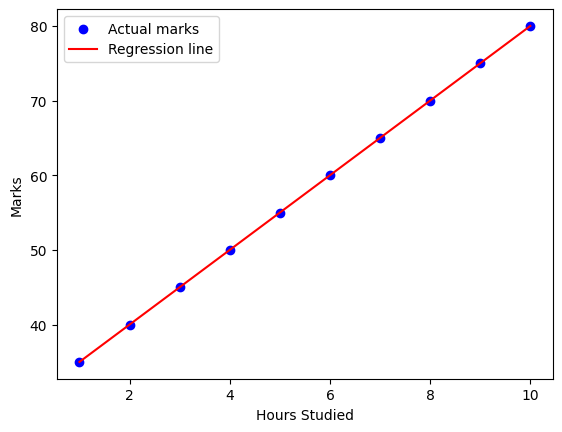

In [8]:
#  2 -	Can you predict student marks based on the number of study hours?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: hours studied vs marks scored
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
marks = np.array([35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

# Create and train model
model = LinearRegression()
model.fit(hours, marks)

# Predict marks for new data
hours_new = np.array([11, 12, 13]).reshape(-1, 1)
predicted_marks = model.predict(hours_new)

print("Predicted marks for study hours 11, 12, 13:", predicted_marks)

# Plot data and regression line
plt.scatter(hours, marks, color='blue', label='Actual marks')
plt.plot(hours, model.predict(hours), color='red', label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.legend()
plt.show()


Mean Squared Error: 13.20
R^2 Score: -0.68


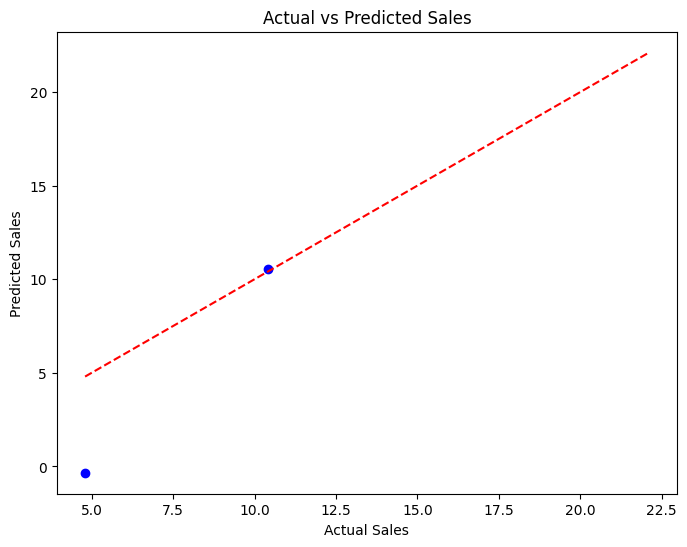

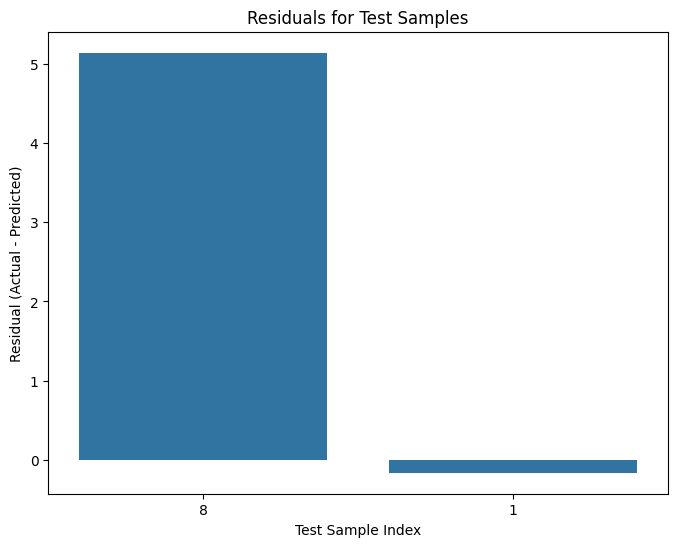

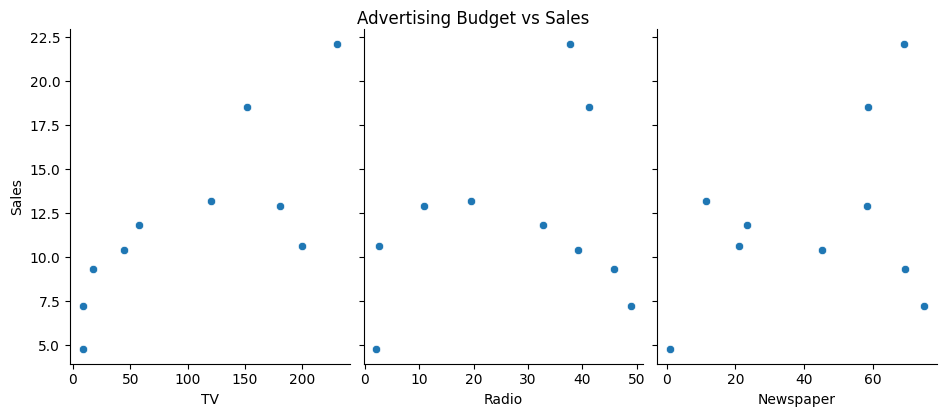

In [9]:
# 3  -	Can you predict sales from advertising budget (TV, Radio, Newspaper)?

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (Advertising budget in thousands of dollars)
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6]
}
df = pd.DataFrame(data)

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot 1: Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Plot 2: Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.barplot(x=residuals.index.astype(str), y=residuals)
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals for Test Samples')
plt.show()

# Optional Plot 3: Pairplot (explore relationships)
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8, kind='scatter')
plt.suptitle('Advertising Budget vs Sales', y=1.02)
plt.show()


Mean Squared Error: 245.86
R^2 Score: 1.00

Test Samples: Actual Weight vs Predicted Weight
Sample 1: Actual = 720 grams, Predicted = 739.06 grams
Sample 2: Actual = 250 grams, Predicted = 238.67 grams


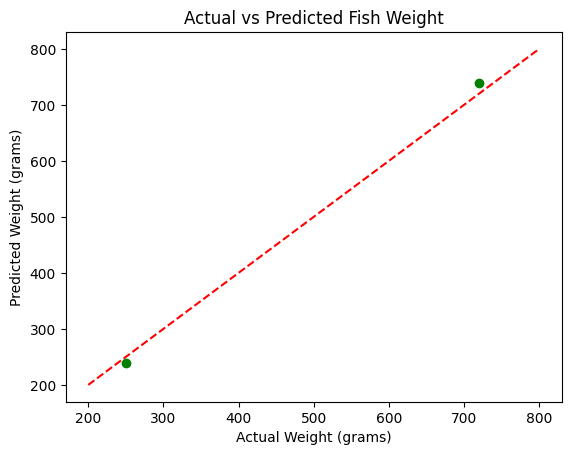

In [10]:
# 4 - Can you predict the weight of a fish from its length and height?

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample fish dataset
data = {
    'length': [10, 12, 15, 18, 20, 22, 25, 28, 30, 32],
    'height': [4, 5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5],
    'weight': [200, 250, 320, 400, 450, 500, 600, 680, 720, 800]  # in grams
}

df = pd.DataFrame(data)

# Features and target
X = df[['length', 'height']]
y = df['weight']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}\n")

# Print actual vs predicted weights with indexes
print("Test Samples: Actual Weight vs Predicted Weight")
for idx, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    print(f"Sample {idx}: Actual = {actual} grams, Predicted = {predicted:.2f} grams")

# Visualize actual vs predicted weights
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Weight (grams)')
plt.ylabel('Predicted Weight (grams)')
plt.title('Actual vs Predicted Fish Weight')
plt.show()


Mean Squared Error: 10.570
R^2 Score: -41.282

Test Samples: Actual Quality vs Predicted Quality
Sample 1: Actual = 6, Predicted = 10.60
Sample 2: Actual = 5, Predicted = 4.87


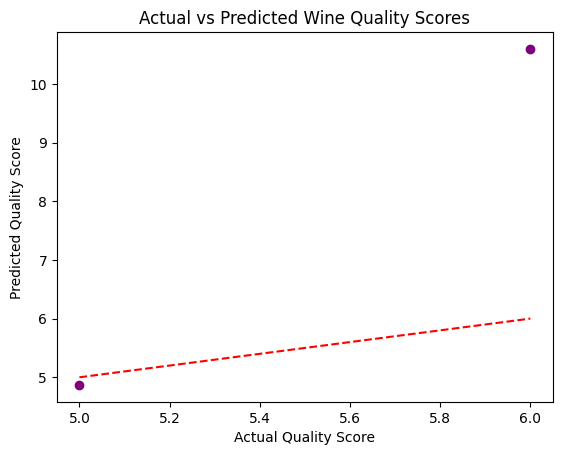

In [11]:
# 5 - Can you predict wine quality score based on chemical properties?

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample wine dataset with chemical properties and quality score
data = {
    'fixed_acidity': [7.4, 7.8, 7.8, 11.2, 7.4, 7.9, 7.3, 7.8, 7.5, 6.7],
    'volatile_acidity': [0.70, 0.88, 0.76, 0.28, 0.70, 0.60, 0.65, 0.58, 0.50, 0.58],
    'citric_acid': [0, 0, 0.04, 0.56, 0, 0.06, 0, 0.02, 0.36, 0.08],
    'residual_sugar': [1.9, 2.6, 2.3, 1.9, 1.9, 1.6, 1.2, 2.0, 6.1, 1.8],
    'chlorides': [0.076, 0.098, 0.092, 0.075, 0.076, 0.069, 0.065, 0.073, 0.071, 0.097],
    'alcohol': [9.4, 9.8, 10.0, 9.8, 9.4, 9.4, 10.0, 9.5, 10.5, 10.0],
    'quality': [5, 5, 5, 6, 5, 5, 5, 5, 6, 5]  # Quality score out of 10
}

df = pd.DataFrame(data)

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict quality scores on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}\n")

# Print actual vs predicted quality scores
print("Test Samples: Actual Quality vs Predicted Quality")
for i, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    print(f"Sample {i}: Actual = {actual}, Predicted = {predicted:.2f}")

# Visualize actual vs predicted quality scores
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Quality Score')
plt.ylabel('Predicted Quality Score')
plt.title('Actual vs Predicted Wine Quality Scores')
plt.show()


In [12]:
#------------------------------------------------------ Logistic Regression (predicting categories) ---------------------------------------------------------------

Accuracy: 1.00

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



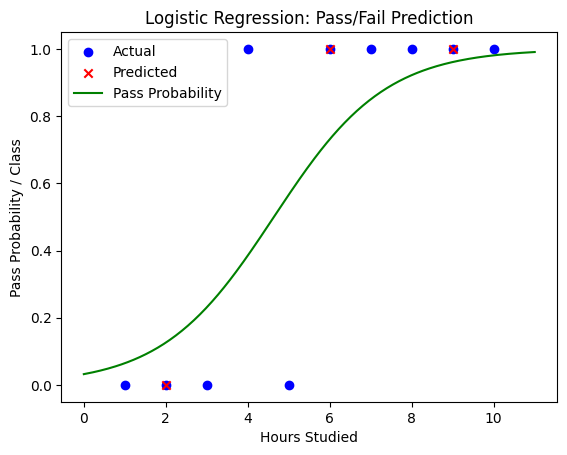

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data: study hours and pass/fail (1=pass, 0=fail)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1])  # Binary labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hours, pass_fail, test_size=0.3, random_state=42)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of passing

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize results
plt.scatter(hours, pass_fail, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted')

# Plot probability curve
hours_range = np.linspace(0, 11, 300).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]
plt.plot(hours_range, probabilities, color='green', label='Pass Probability')

plt.xlabel('Hours Studied')
plt.ylabel('Pass Probability / Class')
plt.title('Logistic Regression: Pass/Fail Prediction')
plt.legend()
plt.show()


In [23]:
# 2 - Can you predict whether a person earns >50K income or not (yes/no) from census data?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# --- 1. Load the Dataset ---
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
# Load the data, treating ' ?' as NaN and removing leading spaces
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

print("Initial data shape:", df.shape)

# --- 2. Data Cleaning ---
# Drop rows with missing values (which were replaced with NaN)
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)

# Target variable transformation: income (>50K is 1, <=50K is 0)
# Note: The raw data contains a trailing period for <=50K, which the na_values/skipinitialspace
# in read_csv sometimes handles, but explicit cleaning is safer.
# We ensure '>50K' is handled regardless of trailing characters.
df['income'] = df['income'].str.strip().apply(lambda x: 1 if x == '>50K' else 0)

# --- 3. Features and Target Split ---
X = df.drop('income', axis=1)
y = df['income']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Note: 'education_num' is technically int64 but represents an ordinal score,
# which can be treated as numerical along with the truly continuous features.
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- 4. Preprocessing Pipeline Definition ---
# Create transformers for different column types
numerical_transformer = StandardScaler() # Recommended for features like age, fnlwgt
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # In this case, nothing should be left, but good practice
)

# --- 5. Model Pipeline ---
# Create a full pipeline with preprocessing + logistic regression model
# Increased max_iter to ensure convergence on this large, complex dataset
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000, random_state=42, solver='liblinear'))
])

# --- 6. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 7. Train the Model ---
print("\nTraining Logistic Regression Model...")
model_pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 8. Predict and Evaluate ---
y_pred = model_pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
# Rows: Actual, Columns: Predicted
# Class 0: <=50K (low income), Class 1: >50K (high income)
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))


Initial data shape: (32561, 15)
Shape after dropping missing values: (32561, 15)

Training Logistic Regression Model...
Training complete.

--- Model Evaluation ---
Accuracy: 0.8561

Confusion Matrix:
[[4604  341]
 [ 596  972]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4945
        >50K       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [19]:
# 2 - Can you predict whether a person earns >50K income or not (yes/no) from census data?


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Load the Data
# The dataset is a classic, often called 'adult.csv' or 'census-income.csv'.
# For this example, we'll simulate loading it by creating a dummy DataFrame structure.
# NOTE: In a real project, you would replace this with:
# data = pd.read_csv('path/to/your/adult.csv', skipinitialspace=True)
try:
    # Use a well-known public URL for the UCI Adult dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    columns = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
        'marital-status', 'occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
    data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Could not load data from URL. Using a synthetic DataFrame for structure. Error: {e}")
    # Create a minimal synthetic DataFrame to ensure the code structure runs
    synthetic_data = {
        'age': [39, 50, 38, 53, 28],
        'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
        'fnlwgt': [77516, 83311, 215646, 234721, 338409],
        'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
        'education-num': [13, 13, 9, 7, 13],
        'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
        'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
        'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
        'race': ['White', 'White', 'White', 'Black', 'Black'],
        'sex': ['Male', 'Male', 'Male', 'Male', 'Female'],
        'capital-gain': [2174, 0, 0, 0, 0],
        'capital-loss': [0, 0, 0, 0, 0],
        'hours-per-week': [40, 13, 40, 40, 40],
        'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
        'income': ['<=50K', '<=50K', '<=50K', '<=50K', '<=50K']
    }
    data = pd.DataFrame(synthetic_data)


# 2. Data Cleaning and Target Encoding
# Handle missing values by dropping rows (simple approach)
data.dropna(inplace=True)

# Encode the target variable: >50K is 1, <=50K is 0
# The target variable name in the loaded dataset often needs a strip() operation
data['income'] = data['income'].str.strip()
data['income_binary'] = (data['income'] == '>50K').astype(int)

# Define features (X) and target (y)
X = data.drop(columns=['income', 'income_binary'])
y = data['income_binary']

# Identify column types
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


# 3. Data Preprocessing Pipeline (ColumnTransformer)
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler() # Scaling numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # One-Hot Encoding categorical features

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns if any, though none are expected here
)


# 4. Define Model and Pipeline
# Create the full pipeline: Preprocessor -> Logistic Regression
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])
# 'class_weight="balanced"' is often a good idea because the dataset is imbalanced (more <=50K)

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 6. Train the Model
print("\n--- Training Logistic Regression Model ---")
model_pipe.fit(X_train, y_train)


# 7. Make Predictions
y_pred = model_pipe.predict(X_test)
y_proba = model_pipe.predict_proba(X_test)[:, 1]


# 8. Evaluate the Model
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"True Negatives (Correct <=50K): {cm[0, 0]}")
print(f"False Positives (Incorrect >50K): {cm[0, 1]}")
print(f"False Negatives (Incorrect <=50K): {cm[1, 0]}")
print(f"True Positives (Correct >50K): {cm[1, 1]}")

# Interpretation Hint
print("\nInterpretation:")
print(f"The model correctly predicted {cm[1, 1]} people earning >50K (True Positives).")
print(f"The model incorrectly predicted {cm[1, 0]} people earning >50K (False Negatives).")

Dataset loaded successfully.

--- Training Logistic Regression Model ---

--- Model Evaluation ---
Accuracy: 0.8052

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4531
        >50K       0.58      0.82      0.68      1502

    accuracy                           0.81      6033
   macro avg       0.75      0.81      0.77      6033
weighted avg       0.84      0.81      0.82      6033

Confusion Matrix:
[[3619  912]
 [ 263 1239]]
True Negatives (Correct <=50K): 3619
False Positives (Incorrect >50K): 912
False Negatives (Incorrect <=50K): 263
True Positives (Correct >50K): 1239

Interpretation:
The model correctly predicted 1239 people earning >50K (True Positives).
The model incorrectly predicted 263 people earning >50K (False Negatives).


In [20]:
# 3 - Can you classify a tumor as benign or malignant using medical data?

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer # Using a built-in dataset for simplicity

# --- 1. Load the Dataset ---
# Load the Wisconsin Breast Cancer Diagnostic dataset
cancer = load_breast_cancer()

# Create a DataFrame for easier handling and inspection
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# The target variable is: 0 for Malignant, 1 for Benign
# Let's verify the class distribution (optional)
print("Target Class Distribution:")
print(df['target'].value_counts())
print("\n")

# --- 2. Separate Features (X) and Target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- 3. Split Data into Training and Testing Sets ---
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Feature Scaling (Highly recommended for Logistic Regression) ---
# Scaling standardizes the features, which helps the model converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5. Initialize and Train the Logistic Regression Model ---
model = LogisticRegression(random_state=42)
print("Training Logistic Regression Model...")
model.fit(X_train_scaled, y_train)
print("Training Complete.\n")

# --- 6. Make Predictions on the Test Set ---
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probability of being class 1 (Benign)

# --- 7. Evaluate the Model ---
print("--- Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# b. Confusion Matrix
# Rows are actual classes, Columns are predicted classes
# [[True Negative (TN), False Positive (FP)],
#  [False Negative (FN), True Positive (TP)]]
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# c. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
# In this dataset: 0 = Malignant, 1 = Benign
report = classification_report(y_test, y_pred, target_names=cancer.target_names)
print(report)

# --- Example of a Single Prediction ---
print("\n--- Single Prediction Example ---")
# Use the first instance from the test set as an example
example_data = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(example_data)[0]
probability = model.predict_proba(example_data)[0]

# Map the predicted label to the text
predicted_class = cancer.target_names[prediction]
actual_class = cancer.target_names[y_test.iloc[0]]

print(f"Actual Diagnosis: {actual_class}")
print(f"Model Prediction: {predicted_class}")
print(f"Probability (Malignant): {probability[0]:.4f}")
print(f"Probability (Benign): {probability[1]:.4f}")

Target Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


Training Logistic Regression Model...
Training Complete.

--- Model Evaluation ---
Accuracy: 0.9825

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


--- Single Prediction Example ---
Actual Diagnosis: malignant
Model Prediction: malignant
Probability (Malignant): 1.0000
Probability (Benign): 0.0000


In [21]:
# 4 - Can you predict whether an email is spam or not spam?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler # Often beneficial for LR, though less critical with TF-IDF

# --- 1. Create a Sample Dataset (Replace with your own CSV file) ---
# Same sample data as before for consistency
data = {
    'label': ['ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam'],
    'text': [
        "Hey, are we still meeting tomorrow for lunch?",
        "WINNER! Claim your FREE prize now by clicking this link.",
        "Please see the attached file for the report.",
        "URGENT: Your account has been suspended. Click here to reactivate.",
        "Sounds good, I'll update the calendar invite.",
        "Free money offer! Limited time deal! Don't miss out!",
        "Can you send me the latest version of the document?",
        "Congratulations! You've won a $1000 gift card. Call 12345."
    ]
}
df = pd.DataFrame(data)

# Convert labels to numerical format: 'ham' (Not Spam) = 0, 'spam' = 1
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['text']  # Email content
y = df['label_encoded'] # Target (0 or 1)

print("Sample Data Head:")
print(df.head())
print("\n")

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Feature Extraction (Text Vectorization using TF-IDF) ---
print("Fitting TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)

# Fit the vectorizer on the training data and transform both train and test sets
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)
print("Vectorization Complete. Shape of vectorized data (Train):", X_train_vec.shape)
print("\n")

# --- (Optional) Feature Scaling ---
# While TF-IDF features are already somewhat normalized, scaling can sometimes help.
# However, for sparse matrices (like the output of TfidfVectorizer), it can make things
# less sparse, which slows down the model. We'll skip it for simplicity here.

# --- 4. Initialize and Train the Logistic Regression Model ---
# C is the inverse of regularization strength; smaller values specify stronger regularization.
model = LogisticRegression(solver='liblinear', random_state=42, C=1.0)
print("Training Logistic Regression Model...")
model.fit(X_train_vec, y_train)
print("Training Complete.\n")

# --- 5. Make Predictions and Get Probabilities ---
y_pred = model.predict(X_test_vec)
# Get the probability of being the positive class (1 = spam)
y_pred_proba = model.predict_proba(X_test_vec)[:, 1]

# --- 6. Evaluate the Model ---
print("--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# Classification Report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print(report)

# --- 7. Test on New Unseen Emails ---
new_emails = [
    "You won a million dollars! Click on this link to claim your prize now.", # Spam-like
    "Just confirming our meeting for next week at 10 AM, let me know if any issues.", # Ham-like
    "This is a legitimate offer, please buy now for FREE shipping and a BONUS prize!", # Spam-like
    "Hello team, please review the document and send me your feedback before EOD." # Ham-like
]

# Transform new emails using the *same* fitted vectorizer
new_emails_vec = tfidf_vectorizer.transform(new_emails)
predictions = model.predict(new_emails_vec)
probabilities = model.predict_proba(new_emails_vec)[:, 1] # Probability of being SPAM (1)

print("\n--- New Email Predictions ---")
for email, prediction, proba in zip(new_emails, predictions, probabilities):
    label = 'SPAM' if prediction == 1 else 'HAM'
    print(f"Email: '{email[:50]}...'")
    print(f"  -> Predicted: {label}")
    print(f"  -> Spam Probability: {proba:.4f}\n")

Sample Data Head:
  label                                               text  label_encoded
0   ham      Hey, are we still meeting tomorrow for lunch?              0
1  spam  WINNER! Claim your FREE prize now by clicking ...              1
2   ham       Please see the attached file for the report.              0
3  spam  URGENT: Your account has been suspended. Click...              1
4   ham      Sounds good, I'll update the calendar invite.              0


Fitting TF-IDF Vectorizer...
Vectorization Complete. Shape of vectorized data (Train): (5, 27)


Training Logistic Regression Model...
Training Complete.

--- Model Evaluation ---
Accuracy: 0.3333

Confusion Matrix:
[[0 2]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted 

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [22]:
# 5 - Can you classify a flower type (Setosa, Versicolor, Virginica) using the Iris dataset?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Load the classic Iris dataset

# --- 1. Load the Iris Dataset ---
iris = load_iris()

# Create a DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map the numerical target (0, 1, 2) to the actual flower names
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['flower_type'] = df['target'].map(target_names)

print("Target Class Distribution:")
print(df['flower_type'].value_counts())
print("\n")

# --- 2. Separate Features (X) and Target (y) ---
X = df[iris.feature_names] # Sepal Length/Width, Petal Length/Width
y = df['target']           # 0, 1, or 2

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4. Feature Scaling (Crucial for Logistic Regression) ---
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features Scaled.\n")

# --- 5. Initialize and Train the Logistic Regression Model ---
# The 'multi_class' parameter is set to 'auto', which selects 'multinomial'
# for multi-class problems and 'ovr' for binary. 'multinomial' is ideal here.
model = LogisticRegression(
    solver='lbfgs',      # Optimization algorithm
    multi_class='multinomial', # Handles multi-class output (3 types)
    random_state=42,
    max_iter=200         # Increase iterations for convergence
)
print("Training Logistic Regression Model (Multinomial)...")
model.fit(X_train_scaled, y_train)
print("Training Complete.\n")

# --- 6. Make Predictions on the Test Set ---
y_pred = model.predict(X_test_scaled)

# --- 7. Evaluate the Model ---
print("--- Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# b. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# c. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

# --- Example of a Single Prediction ---
print("\n--- Single Prediction Example ---")
# Using the first instance from the test set
example_data = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(example_data)[0]
probability = model.predict_proba(example_data)[0]

predicted_class = iris.target_names[prediction]
actual_class_index = y_test.iloc[0]
actual_class = iris.target_names[actual_class_index]

print(f"Actual Flower Type: {actual_class}")
print(f"Model Prediction: {predicted_class}")
print(f"Probabilities (Setosa, Versicolor, Virginica): {probability.round(4)}")

Target Class Distribution:
flower_type
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


Features Scaled.

Training Logistic Regression Model (Multinomial)...
Training Complete.

--- Model Evaluation ---
Accuracy: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Single Prediction Example ---
Actual Flower Type: virginica
Model Prediction: virginica
Probabilities (Setosa, Versicolor, Virginica): [0.     0.1014 0.8985]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
